In [58]:
import numpy as np
import matplotlib.pyplot as plt
import gstools as gs
import math

In [118]:
a = np.ones((3,3))
b = np.array([[1,2,3],[2,3,4],[3,4,5]])
c = np.array([[1,2,3],[2,3,4],[3,4,5]])
b*c + a

array([[ 2.,  5., 10.],
       [ 5., 10., 17.],
       [10., 17., 26.]])

In [143]:
coord_x = range(0,25)
coord_y = range(0,25)

# independent variable
x_indpt = np.random.normal(0, 1, (25, 25))

# z_case0: no spatial heterogeneity 
# z_case1: low spatial heterogeneity
# z_case2: high spatial heterogeneity
z_case0, z_case1, z_case2 = np.zeros((25, 25)), np.zeros((25, 25)), np.zeros((25, 25))
b0_case0, b0_case1, b0_case2 = np.ones((25, 25)), np.ones((25, 25)), np.ones((25, 25))
b1_case0, b1_case1, b1_case2 = 6.5 * np.ones((25, 25)), np.zeros((25, 25)), np.zeros((25, 25))

for i in coord_x:
    for j in coord_y:
        b0_case1[i,j] += (i+j) / 12.5
        b1_case1[i,j] = i/6.25

        b0_case2[i,j] += 4*np.sin(math.pi * i / 25.0)
        b1_case2[i,j] = 1 + (1/42)*(75 - (12.5-i)**2)*(75-(12.5-j)**2)

z_case0 = b0_case0 + b1_case0 * x_indpt
z_case1 = b0_case1 + b1_case1 * x_indpt
z_case2 = b0_case2 + b1_case2 * x_indpt

r_case0 = np.random.normal(0, np.sqrt(np.var(z_case0)/2), (25, 25))

sigma_case1 = np.var(z_case1)  # Total variance (example)
c0_case1 = sigma_case1 / 2  # Nugget (50% of the total variance)
c1_case1 = sigma_case1 / 2  # Sill contribution
model_case1 = gs.Exponential(dim=2, var=c0_case1 + c1_case1, len_scale=1.5, nugget=c0_case1/(c0_case1+c1_case1))
srf = gs.SRF(model_case1, seed=42)  # Spatial random field
r_case1 = srf((coord_x, coord_y), mesh_type='structured')

sigma_case2 = np.var(z_case2)  # Total variance (example)
c0_case2 = sigma_case2 / 4  # Nugget (50% of the total variance)
c1_case2 = sigma_case2 / 4 * 3  # Sill contribution
model_case2 = gs.Exponential(dim=2, var=c0_case2 + c1_case2, len_scale=3, nugget=c0_case2/(c0_case2+c1_case2))
srf = gs.SRF(model_case2, seed=42)  # Spatial random field
r_case2 = srf((coord_x, coord_y), mesh_type='structured')

z0_r0 = z_case0 + r_case0
z2_r2 = z_case2 + r_case2

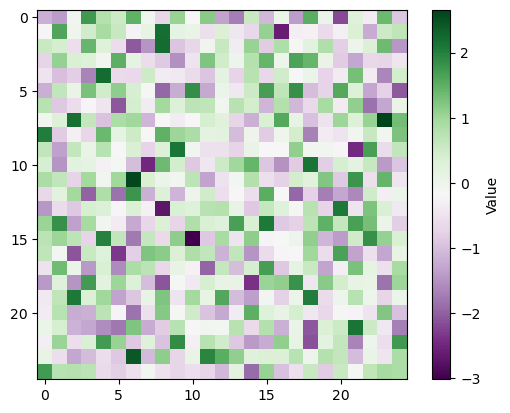

In [149]:
r_case0 = np.random.normal(0, np.sqrt(np.var(z_case0)/2), (25, 25))
plt.imshow(x_indpt, cmap='PRGn', interpolation='none')
plt.colorbar(label='Value')  # Add a color bar to show the scale
plt.show()

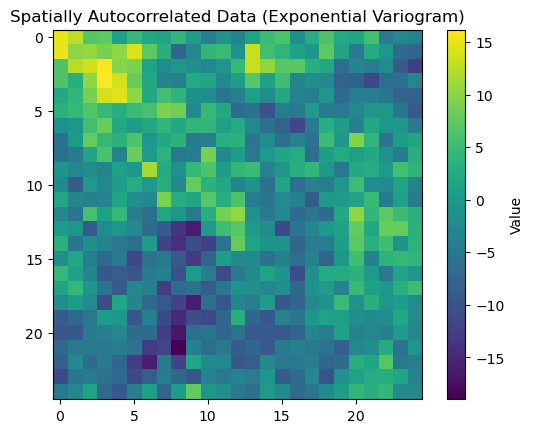

In [53]:
import numpy as np
import gstools as gs
import matplotlib.pyplot as plt

# Variance of the process
sigma2 = np.var(z_case0)  # Total variance (example)
c0 = sigma2 / 4  # Nugget (50% of the total variance)
c1 = 3*sigma2 / 4  # Sill contribution

# Define the exponential variogram model
model = gs.Exponential(dim=2, var=c0 + c1, len_scale=3, nugget=c0/(c0+c1))

# Generate a 25x25 grid
x = np.linspace(0, 24, 25)
y = np.linspace(0, 24, 25)

# Simulate the spatially autocorrelated field
srf = gs.SRF(model, seed=42)  # Spatial random field
field = srf((x, y), mesh_type='structured')

# Plot the field
plt.imshow(field, cmap='viridis', interpolation='none')
plt.colorbar(label='Value')
plt.title('Spatially Autocorrelated Data (Exponential Variogram)')
plt.show()


In [34]:
x = np.linspace(0, 24, 25)
y = np.linspace(0, 24, 25)
xv, yv = np.meshgrid(x, y)

In [40]:
srf

SRF(model=Exponential, mean=0.0, generator=RandMeth)